<a href="https://colab.research.google.com/github/iru99/pytorch_Tutorial/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

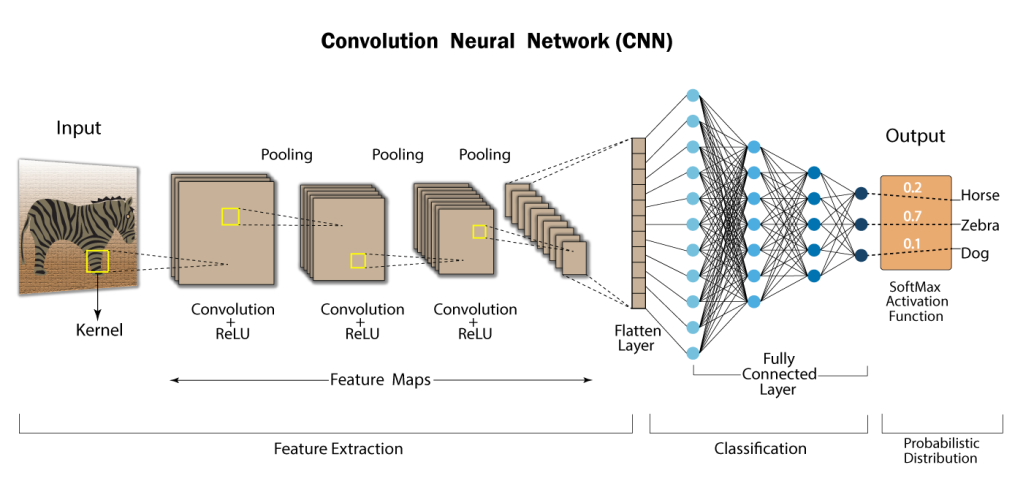

A Convolutional Neural Network (CNN) is a deep learning model, inspired by the human visual cortex, specialized for analyzing grid-like data, especially images, by automatically learning hierarchical patterns (edges to complex objects) through convolutional layers (filters) and pooling layers (downsampling) to achieve high accuracy in tasks like image classification, object detection, and facial recognition. CNNs use parameter sharing and spatial invariance, allowing them to recognize patterns regardless of their location in the input, making them highly efficient for visual recognition tasks.

More Information : https://setosa.io/ev/image-kernels/

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# before import data we need to trnasform data
# Convert MNIST image files into a tensors of 4-dimensions (# of images, height, width, color channel)

transform = transforms.ToTensor()

In [46]:
# Train data

train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

In [47]:
# Test data

test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [48]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [49]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

**Below is how to check where the content is saved**

In [50]:
cd ../

/


In [51]:
pwd

'/'

In [52]:
ls

bin@       datalab/  kaggle/  libx32@  proc/               run/   tmp/
boot/      dev/      lib@     media/   python-apt/         sbin@  tools/
cnn_data/  etc/      lib32@   mnt/     python-apt.tar.xz*  srv/   usr/
content/   home/     lib64@   opt/     root/               sys/   var/


In [53]:
cd cnn_data

/cnn_data


In [54]:
ls

MNIST/


In [55]:
cd ../

/


In [56]:
ls

bin@       datalab/  kaggle/  libx32@  proc/               run/   tmp/
boot/      dev/      lib@     media/   python-apt/         sbin@  tools/
cnn_data/  etc/      lib32@   mnt/     python-apt.tar.xz*  srv/   usr/
content/   home/     lib64@   opt/     root/               sys/   var/


In [57]:
cd content/

/content


In [58]:
pwd

'/content'

**Back to Code**

In [59]:
# create a small batch size for images (10)

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [60]:
# Define CNN model
# Describe Convolutional layer (2 layers)
# Just a example

Conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1)
Conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1)

In [61]:
# Grab 1 MNIST record/image

for i, (X_train, y_train) in enumerate(train_data):
  break

In [62]:
X_train.shape

torch.Size([1, 28, 28])

torch.Size([1, 28, 28]) --> 1 image, 28 by 28 pixels

In [63]:
# 2D image --> 4D batch

x = X_train.view(1,1,28,28)

In [64]:
# Perform 1st convolution

x = F.relu(Conv1(x)) # rectified linear unit for activation function


In [65]:
x.shape

torch.Size([1, 6, 26, 26])

torch.Size([1, 6, 26, 26]) --> 1 single image, 6 is the filters we asked, 26 by 26 pixels

In [66]:
# pass thru the pooling layer

x = F.max_pool2d(x, 2,2) # kernal = 2, stripe =2

In [67]:
x.shape

torch.Size([1, 6, 13, 13])

pooling --> 26/2 = 13

In [68]:
# Second Conv layer

x = F.relu(Conv2(x))
x.shape

torch.Size([1, 16, 11, 11])

torch.Size([1, 16, 11, 11]) --> 11 because we didn't set padding

So we loss 2 pixels around the outside of the image

In [69]:
# Pooling layer 2
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 16, 5, 5])

torch.Size([1, 16, 5, 5]) --> 11/2 = 5.5

but we have to round down cause you can't invent data to round up

So, we aready run thru convolutional layer using one image

convolution --> pooling--> convolution --> pooling --> output

**Build Model for our convolutional layer**

In [72]:
# Model class

class convolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.Conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1)
    self.Conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1)
    # Fully connected layer
    self.fc1 = nn.Linear(in_features=5*5*16, out_features=120)
    self.f2 = nn.Linear(in_features=120, out_features=84)
    self.f3 = nn.Linear(in_features=84, out_features=10)

  def forward(self, X):
    X = F.relu(self.Conv1(X))
    X = F.max_pool2d(X, 2,2)
    # Second Pass
    X = F.relu(self.Conv2(X))
    X = F.max_pool2d(X, 2,2)
    # Flatten
    X = X.view(-1, 16*5*5) # -1 --> vary the batch size

    # Fully connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.f2(X))
    X = self.f3(X)

    return F.log_softmax(X, dim=1)

In [75]:
# Create an Instance of our model

torch.manual_seed(41)
model = convolutionalNetwork()
model

convolutionalNetwork(
  (Conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (Conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (f2): Linear(in_features=120, out_features=84, bias=True)
  (f3): Linear(in_features=84, out_features=10, bias=True)
)

In [76]:
# Loss function Optimizer

criterian = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Smaller the linear rate, longer its gonna take to train

In [79]:
# Train and test

import time
start_time = time.time()

# Create variable to track things

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For loop of epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  #Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1 # start batches at 1
    y_pred = model(X_train) # forward pass
    loss = criterian(y_pred, y_train) # calculate loss

    predicted = torch.max(y_pred.data, 1)[1] # Add up the number of correct predictions
    batch_corr = (predicted == y_train).sum() # How many we got correct from this batch
    trn_corr += batch_corr # Keep track as we go along in training

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out some results
    if b%600 == 0:
      print(f'epoch: {i}  batch: {b}  loss: {loss.item()}  \
      accuracy: {trn_corr.item()*100/(10*b)}%')

  train_losses.append(loss)
  train_correct.append(trn_corr)

# Test
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

    loss = criterian(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'Training took {total/60} minutes')

epoch: 0  batch: 600  loss: 0.00036099221324548125        accuracy: 99.4%
epoch: 0  batch: 1200  loss: 0.0001712304074317217        accuracy: 99.35833333333333%
epoch: 0  batch: 1800  loss: 0.0005378525820560753        accuracy: 99.3%
epoch: 0  batch: 2400  loss: 0.027378559112548828        accuracy: 99.22083333333333%
epoch: 0  batch: 3000  loss: 0.0002596829435788095        accuracy: 99.23666666666666%
epoch: 0  batch: 3600  loss: 8.657989383209497e-05        accuracy: 99.23055555555555%
epoch: 0  batch: 4200  loss: 0.00040106248343363404        accuracy: 99.20714285714286%
epoch: 0  batch: 4800  loss: 1.2349883036222309e-05        accuracy: 99.18541666666667%
epoch: 0  batch: 5400  loss: 0.00046615247265435755        accuracy: 99.19814814814815%
epoch: 0  batch: 6000  loss: 0.000162848416948691        accuracy: 99.21%
epoch: 1  batch: 600  loss: 6.399912672350183e-05        accuracy: 99.5%
epoch: 1  batch: 1200  loss: 0.0002539866545703262        accuracy: 99.45833333333333%
epoch: 

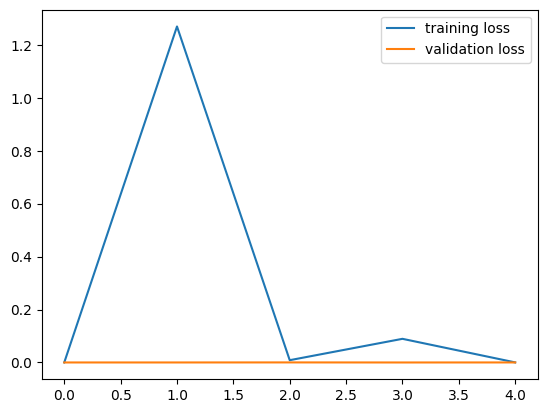

In [91]:
#Graph the loss at epoch

train_losses = [tl.item() if hasattr(tl, "item") else tl for tl in train_losses]
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.legend()

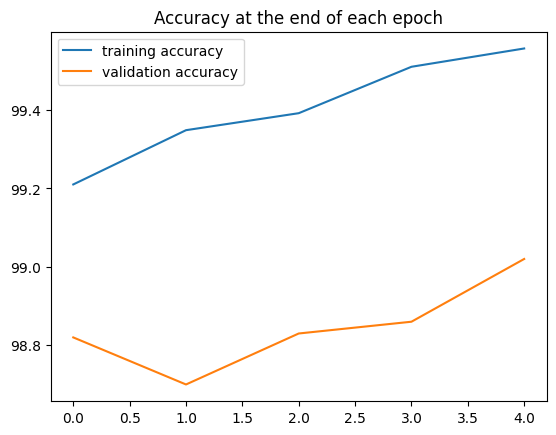

In [92]:
# Graph the accuracy at the end of the each epoch

plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

In [93]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [97]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()
  print(f'Test accuracy: {correct.item()/len(test_data)*100}%')

Test accuracy: 99.02%


In [98]:
# Grab an image

test_data[4143] # Tensor with an image in it


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [99]:
# Grab just the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [100]:
# Reshape it

test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

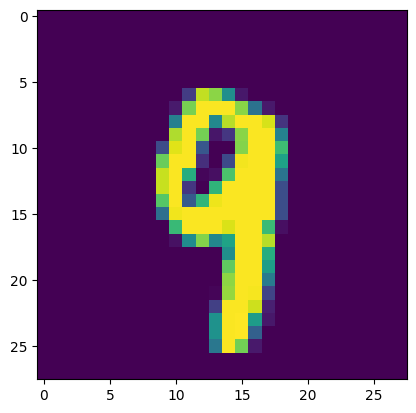

In [101]:
# Show the image
plt.imshow(test_data[4143][0].reshape(28,28))

In [102]:
# Pass the image thru our model

model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28)) # batch size of 1,1 color channel, 28x28 image

In [103]:
# Check the new prediction

new_prediction

tensor([[-2.8713e+01, -2.8914e+01, -2.8284e+01, -2.4172e+01, -1.4805e+01,
         -2.2936e+01, -4.6004e+01, -1.8365e+01, -2.0018e+01, -3.5763e-07]])

In [104]:
new_prediction.argmax()

tensor(9)